# Download Dataset


First, we download the `PlantVillage` dataset from Google Drive by using the unique `id` it holds and unzip the downloaded **PlantVillage.zip** into the **PlantVillage** dataset folder.

In [5]:
import numpy as np
import pickle
import cv2
import os
import matplotlib.pyplot as plt
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

# Test Model


We write the following `predict_disease` function to predict the class or disease of a plant image.

We just need to provide the complete path to the image and it displays the image along with its prediction class or plant disease.

In [6]:
class_dict = {0:"Pepper bell Bacterial_spot",
              1:"Pepper bell healthy",
              2:"Potato Early blight",
              3:"Potato Late blight",
              4:"Potato healthy",
              5:"Tomato Bacterial Spot",
              6:"Tomato Early blight",
              7:"Tomato Late blight",
              8:"Tomato Leaf Mold",
              9:"Tomato Septoria leaf spot",
              10:"Tomato Spider mites Two spotted spider mite",
              11:"Tomato Target Spot",
              12:"Tomato Tomato YellowLeaf Curl_Virus",
              13:"Tomato Tomato mosaic virus",
              14:"Tomato_healthy"}

Load the trained model and its labels for prediction.

In [7]:
from keras.models import load_model

# Load the model
model = load_model('plant_disease_model.h5')

We use the `convert_image_to_array` function to resize an image and `predict_disease` function to predict the class or disease of a plant image.

We just need to provide the complete path to the image and it displays the image along with its prediction class or plant disease.

In [9]:
# Dimension of resized image
DEFAULT_IMAGE_SIZE = tuple((256, 256))

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, DEFAULT_IMAGE_SIZE)
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

def predict_disease(image_path):
    image_array = convert_image_to_array(image_path)
    np_image = np.array(image_array, dtype=np.float16) / 225.0
    np_image = np.expand_dims(np_image,0)
    predict_x=model.predict(np_image)
    ans = class_dict[np.argmax(predict_x)]
    print(ans)

Predict disease of any plant image.

1/1 [==============================] - 0s 60ms/step
Tomato Bacterial Spot


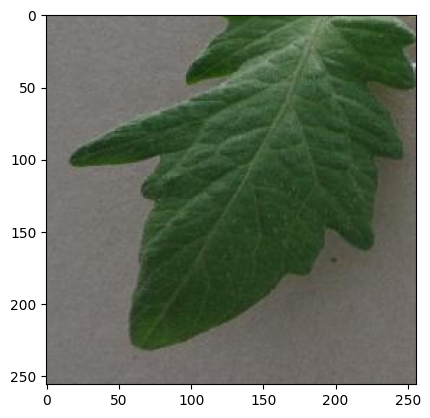

In [20]:
image_path = 'image1.JPG'
predict_disease(image_path)

image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

